In [1]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import model_from_json
from PIL import Image, ImageChops, ImageEnhance
import PIL
from tqdm import tqdm
import tensorflow as tf

# Set seed for reproducibility
np.random.seed(2)

# Check TensorFlow version
print(tf.__version__)

2.14.0


In [2]:
DATA_DIR = 'CASIA2/'
print(os.listdir(DATA_DIR))

['Au', 'CASIA 2 Groundtruth', 'Tp']


In [3]:
# ELA function
def ELA(img_path, quality=90):
    TEMP = 'ela_temp.jpg'
    SCALE = 10
    original = Image.open(img_path)
    try:
        original.save(TEMP, quality=quality)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
    except:
        original = original.convert('RGB')
        original.save(TEMP, quality=quality)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
    
    diff_np = np.asarray(diff)
    diff_np = (diff_np * SCALE).clip(0, 255).astype(np.uint8)
    diff = Image.fromarray(diff_np)
    
    return diff

# Check if the file is supported
SUPPORTED_FORMATS = ['.jpg', '.jpeg', '.png']
def is_supported_file(filename):
    ext = os.path.splitext(filename)[1].lower()
    return ext in SUPPORTED_FORMATS

# Paths
dataset_path = 'CASIA2/'
path_original = 'Au/'
path_tampered = 'Tp/'

total_original = os.listdir(dataset_path + path_original)
total_tampered = os.listdir(dataset_path + path_tampered)

pristine_images = [os.path.join(dataset_path, path_original, i) for i in total_original]
fake_images = [os.path.join(dataset_path, path_tampered, i) for i in total_tampered]

output_path = '../input/preprocessed-ela-images/'
fake_images_path = os.path.join(output_path, "resized_images", "fake_images")
pristine_images_path = os.path.join(output_path, "resized_images", "pristine_images")

if not os.path.exists(fake_images_path):
    os.makedirs(fake_images_path)
if not os.path.exists(pristine_images_path):
    os.makedirs(pristine_images_path)

height, width = 224, 224

# Process and save fake images
for fake_image in tqdm(total_tampered):
    if not is_supported_file(fake_image):
        print(f"Skipping unsupported file format: {fake_image}")
        continue
    
    try:
        img = Image.open(os.path.join(dataset_path, path_tampered, fake_image)).convert("RGB")
        img = img.resize((height, width), PIL.Image.LANCZOS)
        img.save(os.path.join(fake_images_path, fake_image))
    except Exception as e:
        print(f"Encountered Invalid File: {fake_image}. Error: {e}")

# Process and save pristine images
for pristine_image in tqdm(total_original):
    if not is_supported_file(pristine_image):
        print(f"Skipping unsupported file format: {pristine_image}")
        continue
    
    try:
        img = Image.open(os.path.join(dataset_path, path_original, pristine_image)).convert("RGB")
        img = img.resize((height, width), PIL.Image.LANCZOS)
        img.save(os.path.join(pristine_images_path, pristine_image))
    except Exception as e:
        print(f"Invalid File: {pristine_image}. Error: {e}")

print("Processing complete!")

  0%|▎                                                                              | 21/5125 [00:00<00:25, 200.87it/s]

Skipping unsupported file format: Thumbs.db
Skipping unsupported file format: Tp_D_CND_M_N_ani00018_sec00096_00138.tif
Skipping unsupported file format: Tp_D_CND_M_N_art00076_art00077_10289.tif
Skipping unsupported file format: Tp_D_CND_M_N_art00077_art00076_10290.tif
Skipping unsupported file format: Tp_D_CND_S_N_ani00073_ani00068_00193.tif
Skipping unsupported file format: Tp_D_CND_S_N_ind00078_ind00077_00476.tif
Skipping unsupported file format: Tp_D_CNN_M_N_ani00023_ani00024_10205.tif
Skipping unsupported file format: Tp_D_CNN_M_N_arc00086_arc00086_00306.tif
Skipping unsupported file format: Tp_D_CNN_M_N_sec10107_sec10101_10299.tif
Skipping unsupported file format: Tp_D_CNN_M_N_sec10110_sec10101_10298.tif
Skipping unsupported file format: Tp_D_CNN_M_N_txt00049_txt00050_10374.tif
Skipping unsupported file format: Tp_D_CNN_M_N_txt00054_txt00050_10375.tif
Skipping unsupported file format: Tp_D_CNN_S_B_cha00025_cha00025_00345.tif
Skipping unsupported file format: Tp_D_CNN_S_B_ind00018_

  1%|▉                                                                              | 61/5125 [00:00<00:33, 153.16it/s]

Skipping unsupported file format: Tp_D_CNN_S_N_arc00020_arc00020_00240.tif
Skipping unsupported file format: Tp_D_CNN_S_N_art00001_ani00074_10442.tif
Skipping unsupported file format: Tp_D_CNN_S_N_art00007_art00008_01197.tif
Skipping unsupported file format: Tp_D_CNN_S_N_art00096_cha00063_10305.tif
Skipping unsupported file format: Tp_D_CNN_S_N_cha00044_cha00043_00364.tif
Skipping unsupported file format: Tp_D_CNN_S_N_ind00005_ind00014_00424.tif
Skipping unsupported file format: Tp_D_CNN_S_N_nat00035_nat00035_00649.tif
Skipping unsupported file format: Tp_D_CNN_S_N_nat00060_nat00060_00667.tif
Skipping unsupported file format: Tp_D_CNN_S_N_nat00095_ani00017_10219.tif
Skipping unsupported file format: Tp_D_CNN_S_N_pla10114_ani00081_10429.tif
Skipping unsupported file format: Tp_D_CNN_S_N_sec00042_ani00070_10541.tif
Skipping unsupported file format: Tp_D_CNN_S_N_sec00042_ani00078_10495.tif
Skipping unsupported file format: Tp_D_CNN_S_N_txt00043_txt00051_10378.tif
Skipping unsupported file

  2%|█▊                                                                            | 119/5125 [00:00<00:23, 215.48it/s]

Skipping unsupported file format: Tp_D_CRD_S_N_ind00029_ind00088_00444.tif
Skipping unsupported file format: Tp_D_CRD_S_N_ind00074_cha00049_00474.tif
Skipping unsupported file format: Tp_D_CRD_S_N_ind00084_ind00024_00481.tif
Skipping unsupported file format: Tp_D_CRD_S_N_sec00003_sec00007_00023.tif
Skipping unsupported file format: Tp_D_CRD_S_N_sec00005_sec00003_00025.tif
Skipping unsupported file format: Tp_D_CRD_S_N_sec00037_art00028_00058.tif
Skipping unsupported file format: Tp_D_CRN_L_N_nat00085_nat00086_10069.tif
Skipping unsupported file format: Tp_D_CRN_M_B_ani00046_ani00001_10100.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ani00069_ani00041_10035.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ani00087_ani00081_10104.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ani00087_ani10101_10103.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ani00097_ani00001_10099.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ani00097_ani10101_10090.tif
Skipping unsupported file

  3%|██▏                                                                           | 142/5125 [00:00<00:26, 190.62it/s]

Skipping unsupported file format: Tp_D_CRN_M_N_arc00071_arc00045_10085.tif
Skipping unsupported file format: Tp_D_CRN_M_N_arc00073_arc00072_10267.tif
Skipping unsupported file format: Tp_D_CRN_M_N_arc00088_arc00064_10394.tif
Skipping unsupported file format: Tp_D_CRN_M_N_art00058_art00049_10529.tif


  4%|██▊                                                                           | 181/5125 [00:01<00:32, 152.33it/s]

Skipping unsupported file format: Tp_D_CRN_M_N_ind00008_pla00050_10422.tif
Skipping unsupported file format: Tp_D_CRN_M_N_ind00010_pla00050_10424.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00083_ani00001_10097.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00083_ani10101_10096.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00084_nat00033_10072.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00084_nat00086_10073.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00084_nat00095_10070.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00084_nat00099_10071.tif
Skipping unsupported file format: Tp_D_CRN_M_N_nat00086_nat00085_10068.tif


  4%|███▍                                                                          | 226/5125 [00:01<00:32, 149.41it/s]

Skipping unsupported file format: Tp_D_CRN_M_N_pla00010_pla00020_10001.tif
Skipping unsupported file format: Tp_D_CRN_M_N_pla00026_pla00038_10147.tif
Skipping unsupported file format: Tp_D_CRN_M_N_pla10110_ani00005_10118.tif
Skipping unsupported file format: Tp_D_CRN_M_N_pla10110_sec00046_10119.tif
Skipping unsupported file format: Tp_D_CRN_M_N_txt00002_txt00032_10300.tif
Skipping unsupported file format: Tp_D_CRN_M_N_txt00050_txt00049_10368.tif
Skipping unsupported file format: Tp_D_CRN_M_O_ani00030_ani00079_10003.tif
Skipping unsupported file format: Tp_D_CRN_M_O_ani00065_ani00041_10036.tif
Skipping unsupported file format: Tp_D_CRN_M_O_ani00071_ani00013_10002.tif
Skipping unsupported file format: Tp_D_CRN_M_O_arc00025_ani00039_10004.tif
Skipping unsupported file format: Tp_D_CRN_M_O_arc00027_ani00030_10005.tif
Skipping unsupported file format: Tp_D_CRN_M_O_art00010_art00009_10166.tif
Skipping unsupported file format: Tp_D_CRN_M_O_pla10102_ani10104_10028.tif
Skipping unsupported file

  5%|████▏                                                                         | 276/5125 [00:01<00:37, 128.61it/s]

Skipping unsupported file format: Tp_D_CRN_S_N_arc00030_pla00026_10066.tif
Skipping unsupported file format: Tp_D_CRN_S_N_art00005_art00005_00497.tif
Skipping unsupported file format: Tp_D_CRN_S_N_art00027_art00013_00695.tif
Skipping unsupported file format: Tp_D_CRN_S_N_art00081_ani00098_00491.tif
Skipping unsupported file format: Tp_D_CRN_S_N_art20026_art20025_01832.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00026_art00013_00500.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00028_art00013_00499.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00029_art00013_00501.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00055_ani00013_00375.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00078_ani00013_00398.tif
Skipping unsupported file format: Tp_D_CRN_S_N_cha00093_ani00081_10408.tif


  6%|████▌                                                                         | 303/5125 [00:02<00:46, 103.73it/s]

Skipping unsupported file format: Tp_D_CRN_S_N_ind00089_ind00088_00484.tif
Skipping unsupported file format: Tp_D_CRN_S_N_ind00100_cha00026_00489.tif
Skipping unsupported file format: Tp_D_CRN_S_N_nat00099_ani00017_10220.tif
Skipping unsupported file format: Tp_D_CRN_S_N_nat00099_nat00061_10074.tif
Skipping unsupported file format: Tp_D_CRN_S_N_nat00099_nat00061_10075.tif


  6%|█████                                                                         | 330/5125 [00:02<00:43, 109.06it/s]

Skipping unsupported file format: Tp_D_CRN_S_N_pla00037_ani00013_00572.tif
Skipping unsupported file format: Tp_D_CRN_S_N_pla00037_pla00038_10064.tif
Skipping unsupported file format: Tp_D_CRN_S_N_sec00058_art00002_00079.tif
Skipping unsupported file format: Tp_D_CRN_S_N_sec00072_cha00026_00093.tif
Skipping unsupported file format: Tp_D_CRN_S_N_sec00074_pla00084_00095.tif
Skipping unsupported file format: Tp_D_CRN_S_N_sec00077_art00039_00098.tif
Skipping unsupported file format: Tp_D_CRN_S_O_cha00029_ani00068_10041.tif
Skipping unsupported file format: Tp_D_CRN_S_O_cha00030_ani00068_10042.tif
Skipping unsupported file format: Tp_D_CRN_S_O_cha00099_ani00061_10045.tif
Skipping unsupported file format: Tp_D_NND_L_B_arc00033_nat00095_00253.tif
Skipping unsupported file format: Tp_D_NND_L_B_arc00072_nat00097_00292.tif
Skipping unsupported file format: Tp_D_NND_L_N_ani00070_nat00099_10503.tif
Skipping unsupported file format: Tp_D_NND_M_B_arc00097_arc00086_00317.tif


  8%|█████▉                                                                        | 392/5125 [00:02<00:23, 198.22it/s]

Skipping unsupported file format: Tp_D_NND_M_B_nat20098_nat20073_01602.tif
Skipping unsupported file format: Tp_D_NND_M_B_sec00077_txt00059_10387.tif
Skipping unsupported file format: Tp_D_NND_M_B_sec00077_txt00065_10388.tif
Skipping unsupported file format: Tp_D_NND_M_B_sec00098_nat00033_00118.tif
Skipping unsupported file format: Tp_D_NND_M_B_sec20062_arc20001_02136.tif
Skipping unsupported file format: Tp_D_NND_M_N_arc00048_arc00086_00268.tif
Skipping unsupported file format: Tp_D_NND_M_N_arc00049_arc00092_00269.tif
Skipping unsupported file format: Tp_D_NND_M_N_arc00058_arc00086_00278.tif
Skipping unsupported file format: Tp_D_NND_M_N_nat20025_arc20001_02225.tif
Skipping unsupported file format: Tp_D_NND_M_N_pla00085_pla00086_00012.tif
Skipping unsupported file format: Tp_D_NND_M_O_cha00097_txt00033_10171.tif
Skipping unsupported file format: Tp_D_NND_M_O_txt00033_cha00097_10172.tif
Skipping unsupported file format: Tp_D_NND_S_B_ind00003_cha00040_00423.tif
Skipping unsupported file

  9%|██████▋                                                                       | 436/5125 [00:02<00:25, 183.06it/s]

Skipping unsupported file format: Tp_D_NNN_M_B_sec00015_sec00082_00036.tif
Skipping unsupported file format: Tp_D_NNN_M_B_sec00028_nat00007_00049.tif
Skipping unsupported file format: Tp_D_NNN_M_B_sec00036_nat00035_20123.tif
Skipping unsupported file format: Tp_D_NNN_M_B_sec20045_arc20001_02127.tif
Skipping unsupported file format: Tp_D_NNN_M_B_txt00052_txt00051_10380.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00010_nat00002_00230.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00050_arc00086_00270.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00054_arc00005_10006.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00061_nat00074_10448.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00061_nat00099_10447.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00068_arc00075_00288.tif
Skipping unsupported file format: Tp_D_NNN_M_N_arc00070_arc00072_00290.tif
Skipping unsupported file format: Tp_D_NNN_M_N_art00037_nat10103_10107.tif
Skipping unsupported file

  9%|███████▏                                                                      | 474/5125 [00:03<00:30, 152.55it/s]

Skipping unsupported file format: Tp_D_NNN_M_N_art00088_txt00002_10327.tif
Skipping unsupported file format: Tp_D_NNN_M_N_art00088_txt00098_10326.tif
Skipping unsupported file format: Tp_D_NNN_M_N_cha00031_ani10101_10048.tif
Skipping unsupported file format: Tp_D_NNN_M_N_cha00074_txt00068_10192.tif
Skipping unsupported file format: Tp_D_NNN_M_N_cha00082_cha00089_10200.tif


 10%|███████▋                                                                      | 507/5125 [00:03<00:34, 134.86it/s]

Skipping unsupported file format: Tp_D_NNN_M_N_nat10103_pla10110_10115.tif
Skipping unsupported file format: Tp_D_NNN_M_N_pla10110_nat10103_10116.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec00030_nat00097_00051.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec00036_nat00095_00057.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec00041_nat00099_10512.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec00046_nat00097_00067.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec00061_nat00095_00082.tif


 12%|█████████                                                                     | 596/5125 [00:03<00:16, 268.50it/s]

Skipping unsupported file format: Tp_D_NNN_M_N_sec20011_nat20033_01446.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec20047_arc20001_02128.tif
Skipping unsupported file format: Tp_D_NNN_M_N_sec20059_arc20022_02134.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00025_txt00098_10328.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00040_txt00042_10007.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00043_txt00051_10379.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00049_txt00059_10367.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00050_txt00059_10369.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00054_txt00059_10370.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00059_txt00050_10373.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00060_txt00061_10186.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00060_txt00062_10183.tif
Skipping unsupported file format: Tp_D_NNN_M_N_txt00061_txt00062_10184.tif
Skipping unsupported file

 13%|█████████▉                                                                    | 651/5125 [00:04<00:20, 215.33it/s]

Skipping unsupported file format: Tp_D_NNN_S_N_ani20005_ani20001_02048.tif
Skipping unsupported file format: Tp_D_NNN_S_N_ani20016_ani20017_02059.tif
Skipping unsupported file format: Tp_D_NNN_S_N_ani20069_ani20070_02111.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00017_ani00058_00237.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00030_cha00023_00250.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00047_arc00086_00267.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00066_cha00096_00416.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00071_ind00001_00421.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00087_arc00087_00307.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc00092_arc00092_00312.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc20040_arc20041_01493.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc20042_arc20039_01495.tif
Skipping unsupported file format: Tp_D_NNN_S_N_arc20043_arc20039_01496.tif
Skipping unsupported file

 14%|██████████▊                                                                   | 710/5125 [00:04<00:18, 241.62it/s]

Skipping unsupported file format: Tp_D_NNN_S_N_nat00042_nat00034_00961.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00059_nat00059_00666.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00061_nat00061_00668.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00086_nat00086_00681.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00090_ani00079_00682.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00091_ani00081_10513.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat00092_nat00092_00684.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20015_nat20018_01519.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20016_nat20015_01520.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20018_nat20015_01522.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20019_nat20015_02219.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20022_nat20015_01526.tif
Skipping unsupported file format: Tp_D_NNN_S_N_nat20023_nat20015_01527.tif
Skipping unsupported file

 15%|███████████▋                                                                  | 771/5125 [00:04<00:16, 263.13it/s]

Skipping unsupported file format: Tp_D_NNN_S_N_sec00054_sec00055_00075.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00063_sec00063_00743.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00085_sec00085_00816.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00086_cha00023_00705.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00093_sec00093_00756.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00097_ani00079_00710.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec00098_sec00082_10364.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec10113_sec10106_10330.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec10113_sec10106_10331.tif
Skipping unsupported file format: Tp_D_NNN_S_N_sec20060_arc20022_02135.tif
Skipping unsupported file format: Tp_D_NNN_S_N_txt00093_txt00095_01299.tif
Skipping unsupported file format: Tp_D_NNN_S_O_arc00012_ani00001_00232.tif
Skipping unsupported file format: Tp_D_NNN_S_O_pla20082_arc20003_01982.tif
Skipping unsupported file

 16%|████████████▊                                                                 | 844/5125 [00:04<00:15, 281.01it/s]

Skipping unsupported file format: Tp_D_NRD_S_N_cha00021_cha00020_00341.tif
Skipping unsupported file format: Tp_D_NRD_S_N_cha00091_ani00058_00411.tif
Skipping unsupported file format: Tp_D_NRD_S_N_cha00097_ani00077_00417.tif
Skipping unsupported file format: Tp_D_NRD_S_N_cha20017_ani20036_02016.tif
Skipping unsupported file format: Tp_D_NRD_S_N_ind00030_ind00031_01323.tif
Skipping unsupported file format: Tp_D_NRD_S_N_ind00050_ind00017_00457.tif
Skipping unsupported file format: Tp_D_NRD_S_N_nat00006_cha00096_00626.tif
Skipping unsupported file format: Tp_D_NRD_S_N_pla00095_cha00029_00349.tif
Skipping unsupported file format: Tp_D_NRD_S_N_sec00001_cha00042_00001.tif
Skipping unsupported file format: Tp_D_NRD_S_N_sec00007_art00002_00027.tif
Skipping unsupported file format: Tp_D_NRD_S_N_sec00011_sec00016_00031.tif
Skipping unsupported file format: Tp_D_NRD_S_N_sec00018_cha00063_00039.tif
Skipping unsupported file format: Tp_D_NRD_S_N_sec00025_sec00098_00046.tif
Skipping unsupported file

 18%|█████████████▉                                                                | 918/5125 [00:05<00:27, 155.72it/s]

Skipping unsupported file format: Tp_D_NRN_M_B_sec00020_cha00095_00041.tif
Skipping unsupported file format: Tp_D_NRN_M_B_sec00095_txt00068_10134.tif
Skipping unsupported file format: Tp_D_NRN_M_B_sec20053_arc20001_02131.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00021_ani00020_10212.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00023_ani00020_10213.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00038_ani00037_10037.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00048_ani00037_10038.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00083_ani00083_10040.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00099_ani00081_10140.tif
Skipping unsupported file format: Tp_D_NRN_M_N_ani00099_ani00100_10145.tif


 18%|██████████████▎                                                               | 937/5125 [00:05<00:30, 135.40it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_arc00023_nat00099_10061.tif
Skipping unsupported file format: Tp_D_NRN_M_N_arc00037_ani00005_10141.tif
Skipping unsupported file format: Tp_D_NRN_M_N_art00013_art00014_10271.tif
Skipping unsupported file format: Tp_D_NRN_M_N_art00014_art00013_10270.tif


 19%|██████████████▋                                                               | 969/5125 [00:05<00:30, 135.97it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_art00052_art00065_10020.tif
Skipping unsupported file format: Tp_D_NRN_M_N_art00052_art00098_10181.tif
Skipping unsupported file format: Tp_D_NRN_M_N_art00098_art00062_10518.tif
Skipping unsupported file format: Tp_D_NRN_M_N_art00098_sec10101_10345.tif


 19%|███████████████▏                                                              | 999/5125 [00:05<00:30, 136.59it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_cha00024_cha00085_10322.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00024_nat00099_10323.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00024_txt00098_10324.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00048_cha00063_10302.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00050_cha00063_10301.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00094_ani10101_10047.tif
Skipping unsupported file format: Tp_D_NRN_M_N_cha00100_ind00002_10051.tif


 21%|████████████████                                                             | 1069/5125 [00:06<00:35, 112.67it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_nat00083_ani00037_10055.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat00086_ani00031_10146.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat00095_nat00083_10080.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat00095_nat00099_10079.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat00098_nat00099_10062.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat00099_nat00023_10348.tif
Skipping unsupported file format: Tp_D_NRN_M_N_nat10103_ani00005_10117.tif


 23%|██████████████████▏                                                           | 1194/5125 [00:08<00:44, 88.14it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_pla00019_pla00020_10009.tif
Skipping unsupported file format: Tp_D_NRN_M_N_pla10115_cha00085_10124.tif
Skipping unsupported file format: Tp_D_NRN_M_N_pla10115_pla10114_10395.tif
Skipping unsupported file format: Tp_D_NRN_M_N_pla10115_txt00065_10125.tif
Skipping unsupported file format: Tp_D_NRN_M_N_pla10115_txt00068_10126.tif
Skipping unsupported file format: Tp_D_NRN_M_N_pla10115_txt00068_10127.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec00007_sec00004_10033.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec00076_pla00050_10389.tif


 24%|██████████████████▌                                                          | 1238/5125 [00:08<00:26, 149.38it/s]

Skipping unsupported file format: Tp_D_NRN_M_N_sec00090_sec00098_10336.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec10101_art00098_10346.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec10105_sec10109_10333.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec10106_sec10109_10332.tif
Skipping unsupported file format: Tp_D_NRN_M_N_sec10112_art00098_10343.tif
Skipping unsupported file format: Tp_D_NRN_M_N_txt00059_pla00050_10390.tif
Skipping unsupported file format: Tp_D_NRN_M_N_txt00065_sec00077_10391.tif
Skipping unsupported file format: Tp_D_NRN_M_N_txt00068_txt10112_10109.tif
Skipping unsupported file format: Tp_D_NRN_M_N_txt10112_nat10103_10110.tif
Skipping unsupported file format: Tp_D_NRN_M_N_txt10112_nat10103_10111.tif
Skipping unsupported file format: Tp_D_NRN_M_O_ani00063_ani00031_10057.tif
Skipping unsupported file format: Tp_D_NRN_M_O_ani00097_ani00036_10039.tif
Skipping unsupported file format: Tp_D_NRN_M_O_ani10104_ani10101_10021.tif
Skipping unsupported file

 26%|███████████████████▋                                                         | 1311/5125 [00:08<00:14, 260.41it/s]

Skipping unsupported file format: Tp_D_NRN_S_B_arc00076_ani00077_00296.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00080_ani00005_00300.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00084_ani00058_00304.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00088_arc00088_00308.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00089_ani00061_00309.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00090_ani00096_00310.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00094_ani00100_00314.tif
Skipping unsupported file format: Tp_D_NRN_S_B_arc00099_ani00058_00319.tif
Skipping unsupported file format: Tp_D_NRN_S_B_art00002_ani00096_00495.tif
Skipping unsupported file format: Tp_D_NRN_S_B_art00004_ani00005_00493.tif
Skipping unsupported file format: Tp_D_NRN_S_B_art00022_ani00061_00504.tif
Skipping unsupported file format: Tp_D_NRN_S_B_art00025_ani00070_00507.tif
Skipping unsupported file format: Tp_D_NRN_S_B_art00030_cha00027_00508.tif
Skipping unsupported file

 27%|████████████████████▋                                                        | 1376/5125 [00:09<00:13, 269.26it/s]

Skipping unsupported file format: Tp_D_NRN_S_B_sec00021_cha00094_00042.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00044_ind00020_00065.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00063_cha00001_00084.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00070_cha00030_00091.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00075_ani00096_00096.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00075_cha00026_00019.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00079_pla00029_00100.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00081_cha00065_00101.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00083_ani00070_00722.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00085_ani00077_00721.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00088_ani00100_00719.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00088_cha00047_00108.tif
Skipping unsupported file format: Tp_D_NRN_S_B_sec00089_ani00070_00718.tif
Skipping unsupported file

 28%|█████████████████████▊                                                       | 1455/5125 [00:09<00:23, 153.17it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_ani20068_ani20067_02110.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00001_ani00058_00005.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00002_arc00045_00018.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00013_ani00005_00233.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00015_ani00013_00235.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00019_arc00019_00239.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00021_ani00058_00241.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00022_ani00081_00242.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00023_ani00031_00243.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00024_cha00026_00244.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00026_cha00026_00246.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00027_cha00026_00247.tif
Skipping unsupported file format: Tp_D_NRN_S_N_arc00034_cha00023_00254.tif
Skipping unsupported file

 30%|██████████████████████▊                                                      | 1519/5125 [00:10<00:16, 218.01it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_art00021_ani00005_00503.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00022_cha00100_01425.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00023_ani00058_00505.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00024_ani00040_00506.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00024_ind00098_01424.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00027_ani00068_01214.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00029_art00029_01216.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00030_art00055_10471.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00033_ani00013_00511.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00034_ani00013_00512.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00034_ani00058_01420.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00036_art00036_00514.tif
Skipping unsupported file format: Tp_D_NRN_S_N_art00037_cha00096_00515.tif
Skipping unsupported file

 31%|███████████████████████▌                                                     | 1571/5125 [00:10<00:17, 207.08it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_cha00030_ani00079_00350.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00031_ani00100_00351.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00032_ani00013_00352.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00035_cha00040_00355.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00040_ani00013_00360.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00062_cha00062_00381.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00067_ani00079_00387.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00070_cha00028_00390.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00071_ani00098_00391.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00072_ani00098_00392.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00079_ani00068_00399.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00084_ani00081_00404.tif
Skipping unsupported file format: Tp_D_NRN_S_N_cha00094_ani00068_00414.tif
Skipping unsupported file

 32%|████████████████████████▊                                                    | 1654/5125 [00:11<00:22, 155.12it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_ind00008_art00009_00426.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00009_pla00050_10423.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00010_art00009_00428.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00013_cha00023_00431.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00020_ind00010_00436.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00021_ind00025_10398.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00022_ind00088_00438.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00025_ind00039_10105.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00025_pla00050_10433.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00028_ind00020_00443.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00047_ind00018_00455.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00056_ind00089_00462.tif
Skipping unsupported file format: Tp_D_NRN_S_N_ind00059_ani00068_00464.tif
Skipping unsupported file

 33%|█████████████████████████▏                                                   | 1676/5125 [00:11<00:22, 152.05it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_nat00076_nat00086_10081.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat00099_ani00078_10527.tif


 34%|██████████████████████████▋                                                   | 1755/5125 [00:12<00:34, 98.71it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_nat20019_nat20024_01523.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20020_nat20023_01524.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20056_nat20054_01560.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20081_nat20082_01585.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20084_nat20082_01588.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20086_nat20082_01590.tif
Skipping unsupported file format: Tp_D_NRN_S_N_nat20097_nat20023_01601.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00074_ani00013_01179.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00077_ani00058_01180.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00085_ani00005_00607.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00085_ani00081_01187.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00091_ani00031_00935.tif
Skipping unsupported file format: Tp_D_NRN_S_N_pla00094_pla00094_01191.tif


 35%|███████████████████████████                                                  | 1802/5125 [00:12<00:26, 127.07it/s]

Skipping unsupported file format: Tp_D_NRN_S_N_pla20031_pla20030_01931.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00013_cha00071_00033.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00016_ani00013_00702.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00026_sec00027_00047.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00041_ani00076_10500.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00042_ani00076_10499.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00042_ani00081_10498.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00048_art00012_00069.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00050_sec00049_00071.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00055_sec00050_00076.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00061_ani00064_00730.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00071_art00064_00706.tif
Skipping unsupported file format: Tp_D_NRN_S_N_sec00071_art00064_00707.tif
Skipping unsupported file

 36%|███████████████████████████▌                                                 | 1831/5125 [00:12<00:20, 164.42it/s]

Skipping unsupported file format: Tp_D_NRN_S_O_ani00084_ani00085_10058.tif
Skipping unsupported file format: Tp_D_NRN_S_O_ani10102_ani10104_10023.tif
Skipping unsupported file format: Tp_D_NRN_S_O_arc00052_cha00023_00272.tif


 38%|█████████████████████████████▌                                               | 1970/5125 [00:13<00:10, 305.03it/s]

Skipping unsupported file format: Tp_S_CND_L_N_cha00084_cha00084_10203.tif
Skipping unsupported file format: Tp_S_CND_M_B_sec00019_sec00019_00040.tif
Skipping unsupported file format: Tp_S_CND_M_N_cha00079_cha00079_10195.tif
Skipping unsupported file format: Tp_S_CND_M_N_cha00088_cha00088_10174.tif
Skipping unsupported file format: Tp_S_CND_M_N_sec00099_sec00099_10365.tif
Skipping unsupported file format: Tp_S_CND_S_B_ani00022_ani00022_00142.tif
Skipping unsupported file format: Tp_S_CND_S_B_cha00088_cha00088_10179.tif
Skipping unsupported file format: Tp_S_CND_S_B_nat00039_nat00039_00958.tif
Skipping unsupported file format: Tp_S_CND_S_B_sec00085_sec00085_00105.tif
Skipping unsupported file format: Tp_S_CND_S_B_sec00097_sec00097_00117.tif
Skipping unsupported file format: Tp_S_CND_S_N_ani00009_ani00009_00129.tif
Skipping unsupported file format: Tp_S_CND_S_N_arc00017_arc00017_01115.tif
Skipping unsupported file format: Tp_S_CND_S_N_art00044_art00044_10406.tif
Skipping unsupported file

 40%|██████████████████████████████▌                                              | 2035/5125 [00:13<00:15, 198.50it/s]

Skipping unsupported file format: Tp_S_CNN_M_N_pla00030_pla00030_10148.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00035_pla00035_10149.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00080_pla00080_10458.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00082_pla00082_10461.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00083_pla00083_10456.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00084_pla00084_10453.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla00094_pla00094_10450.tif
Skipping unsupported file format: Tp_S_CNN_M_N_pla10114_pla10114_10430.tif
Skipping unsupported file format: Tp_S_CNN_M_N_sec00042_sec00042_10493.tif
Skipping unsupported file format: Tp_S_CNN_M_N_sec00042_sec00042_10494.tif
Skipping unsupported file format: Tp_S_CNN_M_N_sec00043_sec00043_10491.tif
Skipping unsupported file format: Tp_S_CNN_M_N_sec00043_sec00043_10492.tif
Skipping unsupported file format: Tp_S_CNN_M_N_sec00046_sec00046_10509.tif
Skipping unsupported file

 41%|███████████████████████████████▎                                             | 2085/5125 [00:13<00:15, 198.47it/s]

Skipping unsupported file format: Tp_S_CNN_M_N_txt00026_txt00026_10329.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00050_txt00050_10372.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00072_txt00072_10204.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00094_txt00094_10161.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00096_txt00096_10163.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00098_txt00098_10153.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00099_txt00099_10154.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00099_txt00099_10156.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt00100_txt00100_10155.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt10101_txt10101_10150.tif
Skipping unsupported file format: Tp_S_CNN_M_N_txt10101_txt10101_10151.tif
Skipping unsupported file format: Tp_S_CNN_M_O_ani00097_ani00097_10101.tif
Skipping unsupported file format: Tp_S_CNN_M_O_ani00097_ani00097_10133.tif
Skipping unsupported file

 42%|████████████████████████████████▎                                            | 2152/5125 [00:13<00:12, 229.18it/s]

Skipping unsupported file format: Tp_S_CNN_S_B_pla00050_pla00050_01159.tif
Skipping unsupported file format: Tp_S_CNN_S_B_pla20010_pla20010_02393.tif
Skipping unsupported file format: Tp_S_CNN_S_B_pla20100_pla20100_02000.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec00008_sec00008_00770.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec00082_sec00082_00102.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec00099_sec00099_00709.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec20003_sec20003_01438.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec20010_sec20010_01445.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec20012_sec20012_01447.tif
Skipping unsupported file format: Tp_S_CNN_S_B_sec20083_sec20083_01673.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ani00052_ani00052_00172.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ani00055_ani00055_00175.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ani00079_ani00079_00821.tif
Skipping unsupported file

 43%|█████████████████████████████████▍                                           | 2228/5125 [00:14<00:08, 344.61it/s]

Skipping unsupported file format: Tp_S_CNN_S_N_cha00057_cha00057_10112.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha00057_cha00057_10113.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha00057_cha00057_10114.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha00080_cha00080_10188.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha00100_cha00100_10157.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha00100_cha00100_10158.tif


 44%|██████████████████████████████████                                           | 2266/5125 [00:14<00:12, 225.36it/s]

Skipping unsupported file format: Tp_S_CNN_S_N_cha20003_cha20003_02002.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha20007_cha20007_02006.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha20020_cha20020_02019.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha20034_cha20034_02033.tif
Skipping unsupported file format: Tp_S_CNN_S_N_cha20045_cha20045_02044.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00004_ind00004_00881.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00008_ind00008_10420.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00008_ind00008_10421.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00009_ind00009_10414.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00021_ind00021_01319.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00024_ind00024_00439.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00025_ind00025_01321.tif
Skipping unsupported file format: Tp_S_CNN_S_N_ind00030_ind00030_00445.tif
Skipping unsupported file

 45%|███████████████████████████████████                                          | 2330/5125 [00:14<00:11, 247.84it/s]

Skipping unsupported file format: Tp_S_CNN_S_N_nat20014_nat20014_02214.tif
Skipping unsupported file format: Tp_S_CNN_S_N_nat20037_nat20037_01541.tif
Skipping unsupported file format: Tp_S_CNN_S_N_nat20045_nat20045_01549.tif
Skipping unsupported file format: Tp_S_CNN_S_N_nat20049_nat20049_01553.tif
Skipping unsupported file format: Tp_S_CNN_S_N_nat20058_nat20058_01562.tif
Skipping unsupported file format: Tp_S_CNN_S_N_nat20059_nat20059_02253.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00001_pla00001_01123.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00009_pla00009_01131.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00010_pla00010_00549.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00010_pla00010_01132.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00013_pla00013_00552.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00017_pla00017_01137.tif
Skipping unsupported file format: Tp_S_CNN_S_N_pla00019_pla00019_00557.tif
Skipping unsupported file

 47%|████████████████████████████████████▏                                        | 2408/5125 [00:14<00:10, 267.41it/s]

Skipping unsupported file format: Tp_S_CNN_S_N_txt00046_txt00046_01274.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00049_txt00049_01276.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00050_txt00050_01277.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00053_txt00053_01279.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00054_txt00054_01280.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00056_txt00056_01281.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00059_txt00059_00692.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00067_txt00067_01298.tif
Skipping unsupported file format: Tp_S_CnN_S_N_txt00071_txt00071_01297.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00072_txt00072_01285.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00075_txt00075_00687.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00075_txt00075_01300.tif
Skipping unsupported file format: Tp_S_CNN_S_N_txt00077_txt00077_01287.tif
Skipping unsupported file

 48%|█████████████████████████████████████                                        | 2469/5125 [00:15<00:10, 248.10it/s]

Skipping unsupported file format: Tp_S_CRD_S_N_cha20039_cha20039_02038.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00039_ind00039_01330.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00047_ind00047_01337.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00052_ind00052_01341.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00052_ind00052_10402.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00093_ind00093_01375.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind00094_ind00094_01376.tif
Skipping unsupported file format: Tp_S_CRD_S_N_ind20020_ind20020_02277.tif
Skipping unsupported file format: Tp_S_CRD_S_N_pla00034_pla00034_01149.tif
Skipping unsupported file format: Tp_S_CRD_S_N_pla20002_pla20002_02398.tif
Skipping unsupported file format: Tp_S_CRD_S_N_sec00020_sec00020_00771.tif
Skipping unsupported file format: Tp_S_CRD_S_N_sec20002_sec20002_01437.tif
Skipping unsupported file format: Tp_S_CRD_S_N_txt00100_txt00100_01293.tif
Skipping unsupported file

 49%|█████████████████████████████████████▉                                       | 2525/5125 [00:15<00:13, 194.57it/s]

Skipping unsupported file format: Tp_S_CRN_M_N_pla00072_pla00072_10459.tif
Skipping unsupported file format: Tp_S_CRN_M_N_sec00039_sec00039_10484.tif
Skipping unsupported file format: Tp_S_CRN_M_N_sec00045_sec00045_10487.tif
Skipping unsupported file format: Tp_S_CRN_M_N_sec00097_sec00097_10130.tif
Skipping unsupported file format: Tp_S_CRN_S_B_arc00095_arc00095_01035.tif
Skipping unsupported file format: Tp_S_CRN_S_B_cha00085_cha00085_10180.tif


 50%|██████████████████████████████████████▎                                      | 2548/5125 [00:15<00:14, 175.50it/s]

Skipping unsupported file format: Tp_S_CRN_S_B_txt00031_txt00031_01272.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00011_ani00011_00131.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00011_ani00011_10222.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00053_ani00053_00173.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00054_ani00054_00174.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00088_ani00088_10138.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ani00098_ani00098_00218.tif


 51%|███████████████████████████████████████                                      | 2604/5125 [00:16<00:14, 174.61it/s]

Skipping unsupported file format: Tp_S_CRN_S_N_arc20016_arc20016_02159.tif
Skipping unsupported file format: Tp_S_CRN_S_N_arc20043_arc20043_02179.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00015_art00015_01204.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00016_art00016_10274.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00035_art00035_10468.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00040_art00040_10462.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00040_art00040_10464.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00059_art00059_10508.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00065_art00065_01238.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art00079_art00079_10287.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art20002_art20002_02497.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art20003_art20003_02496.tif
Skipping unsupported file format: Tp_S_CRN_S_N_art20022_art20022_01828.tif
Skipping unsupported file

 52%|███████████████████████████████████████▉                                     | 2662/5125 [00:16<00:20, 119.32it/s]

Skipping unsupported file format: Tp_S_CRN_S_N_cha20007_cha20007_02421.tif
Skipping unsupported file format: Tp_S_CRN_S_N_cha20011_cha20011_02010.tif
Skipping unsupported file format: Tp_S_CRN_S_N_cha20037_cha20037_02036.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00013_ind00013_10410.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00044_sec00007_00453.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00050_ind00050_01339.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00051_ind00051_01340.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00058_ind00058_10427.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind00081_ind00081_00479.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind20016_ind20016_01757.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind20017_ind20017_01758.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind20024_ind20024_01765.tif
Skipping unsupported file format: Tp_S_CRN_S_N_ind20044_ind20044_01785.tif
Skipping unsupported file

 52%|████████████████████████████████████████▎                                    | 2679/5125 [00:16<00:21, 115.65it/s]

Skipping unsupported file format: Tp_S_CRN_S_N_nat00098_nat00098_10063.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla00005_pla00005_01127.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla00034_pla00034_00569.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla00059_pla00059_01168.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla00060_pla00060_01169.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla00073_pla00073_00601.tif


 53%|████████████████████████████████████████▉                                    | 2727/5125 [00:17<00:15, 157.72it/s]

Skipping unsupported file format: Tp_S_CRN_S_N_pla20002_pla20002_01902.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20012_pla20012_01912.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20035_pla20035_01935.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20037_pla20037_01937.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20055_pla20055_01955.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20058_pla20058_01958.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20064_pla20064_01964.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20065_pla20065_01965.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20066_pla20066_01966.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20067_pla20067_01967.tif
Skipping unsupported file format: Tp_S_CRN_S_N_pla20071_pla20071_02365.tif
Skipping unsupported file format: Tp_S_CRN_S_N_sec00022_sec00022_00749.tif
Skipping unsupported file format: Tp_S_CRN_S_N_sec00033_sec00033_00054.tif
Skipping unsupported file

 57%|███████████████████████████████████████████▌                                 | 2898/5125 [00:17<00:05, 434.85it/s]

Skipping unsupported file format: Tp_S_NND_S_N_art20014_art20014_01820.tif
Skipping unsupported file format: Tp_S_NND_S_N_art20020_art20020_01826.tif
Skipping unsupported file format: Tp_S_NND_S_N_art20055_art20055_02330.tif
Skipping unsupported file format: Tp_S_NND_S_N_art20063_art20063_02326.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00027_cha00027_00347.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00049_cha00049_00852.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00067_cha00067_00858.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00074_cha00074_00394.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00076_cha00076_10189.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00091_cha00091_00878.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha00092_cha00092_00412.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha20003_cha20003_02418.tif
Skipping unsupported file format: Tp_S_NND_S_N_cha20024_cha20024_02425.tif
Skipping unsupported file

 58%|████████████████████████████████████████████▎                                | 2949/5125 [00:17<00:07, 295.60it/s]

Skipping unsupported file format: Tp_S_NNN_M_N_art00033_art00033_10552.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00039_art00039_10545.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00043_art00043_10540.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00043_art00043_10542.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00050_art00050_10535.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00054_art00054_10538.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00061_art00061_10520.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00062_art00062_10517.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00068_art00068_10460.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00075_art00075_10516.tif
Skipping unsupported file format: Tp_S_NNN_M_N_art00084_art00084_10521.tif
Skipping unsupported file format: Tp_S_NNN_M_N_cha00074_cha00074_10191.tif


 58%|████████████████████████████████████████████▉                                | 2990/5125 [00:17<00:07, 273.75it/s]

Skipping unsupported file format: Tp_S_NNN_M_N_pla00050_pla00050_10431.tif
Skipping unsupported file format: Tp_S_NNN_M_N_pla00061_pla00061_01170.tif
Skipping unsupported file format: Tp_S_NNN_M_N_pla0006_pla00006_01128.tif
Skipping unsupported file format: Tp_S_NNN_M_N_pla20055_pla20055_02376.tif
Skipping unsupported file format: Tp_S_NNN_M_N_sec00036_sec00036_10505.tif
Skipping unsupported file format: Tp_S_NNN_M_N_sec00040_sec00040_10490.tif
Skipping unsupported file format: Tp_S_NNN_M_N_sec00045_sec00045_00066.tif
Skipping unsupported file format: Tp_S_NNN_M_N_sec00075_sec00075_10349.tif
Skipping unsupported file format: Tp_S_NNN_M_N_txt00032_txt00032_10341.tif
Skipping unsupported file format: Tp_S_NNN_M_N_txt00061_txt00061_10019.tif
Skipping unsupported file format: Tp_S_NNN_M_N_txt00065_txt00065_10120.tif
Skipping unsupported file format: Tp_S_NNN_M_N_txt00065_txt00065_10132.tif
Skipping unsupported file format: Tp_S_NNN_M_N_txt00094_txt00094_10160.tif
Skipping unsupported file 

 60%|██████████████████████████████████████████████                               | 3067/5125 [00:18<00:06, 297.19it/s]

Skipping unsupported file format: Tp_S_NNN_S_B_arc00025_arc00025_01097.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00043_arc00043_10239.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00051_arc00051_01075.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00056_arc00056_00276.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00056_arc00056_01070.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00063_arc00063_00283.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00067_arc00067_00287.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00070_arc00070_01057.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00077_arc00077_00297.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00092_arc00092_01038.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00094_arc00094_01043.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00097_arc00097_01033.tif
Skipping unsupported file format: Tp_S_NNN_S_B_arc00098_arc00098_01032.tif
Skipping unsupported file

 62%|███████████████████████████████████████████████▍                             | 3158/5125 [00:18<00:05, 357.77it/s]

Skipping unsupported file format: Tp_S_NNN_S_B_art20011_art20011_02493.tif
Skipping unsupported file format: Tp_S_NNN_S_B_art20026_art20026_02337.tif
Skipping unsupported file format: Tp_S_NNN_S_B_art20049_art20049_01855.tif
Skipping unsupported file format: Tp_S_NNN_S_B_art20058_art20058_02328.tif
Skipping unsupported file format: Tp_S_NNN_S_B_art20060_art20060_02327.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00008_cha00008_00328.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00057_cha00057_00377.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00058_cha00058_00378.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00076_cha00076_00396.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00089_cha00089_10187.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha00089_cha00089_10199.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha20002_cha20002_02001.tif
Skipping unsupported file format: Tp_S_NNN_S_B_cha20008_cha20008_02422.tif
Skipping unsupported file

 63%|████████████████████████████████████████████████▋                            | 3238/5125 [00:18<00:05, 324.67it/s]

Skipping unsupported file format: Tp_S_NNN_S_B_nat20001_nat20001_01505.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20002_nat20002_02202.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20009_nat20009_02209.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20010_nat20010_01514.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20012_nat20012_02228.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20015_nat20015_02215.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20016_nat20016_02216.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20020_nat20020_02220.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20027_nat20027_01531.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20027_nat20027_02227.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20030_nat20030_02230.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20031_nat20031_02231.tif
Skipping unsupported file format: Tp_S_NNN_S_B_nat20043_nat20043_01547.tif
Skipping unsupported file

 65%|█████████████████████████████████████████████████▋                           | 3311/5125 [00:18<00:04, 419.85it/s]

Skipping unsupported file format: Tp_S_NNN_S_B_txt00026_txt00026_01271.tif
Skipping unsupported file format: Tp_S_NNN_S_B_txt00028_txt00028_20117.tif
Skipping unsupported file format: Tp_S_NNN_S_B_txt00079_txt00079_01288.tif
Skipping unsupported file format: Tp_S_NNN_S_B_txt00092_txt00092_00691.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00003_ani00003_00834.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00004_ani00004_00124.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00006_ani00006_00833.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00007_ani00007_00127.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00008_ani00008_00128.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00012_ani00012_00836.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00023_ani00023_00010.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00031_ani00031_00151.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani00034_ani00034_00154.tif
Skipping unsupported file

 67%|███████████████████████████████████████████████████▍                         | 3426/5125 [00:19<00:04, 346.20it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_ani20002_ani20002_01451.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20007_ani20007_02050.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20008_ani20008_02051.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20009_ani20009_02052.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20010_ani20010_02053.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20013_ani20013_02056.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20014_ani20014_02057.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20019_ani20019_02062.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20020_ani20020_02063.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20020_ani20020_02439.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20022_ani20022_02065.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20024_ani20024_02067.tif
Skipping unsupported file format: Tp_S_NNN_S_N_ani20025_ani20025_02441.tif
Skipping unsupported file

 71%|██████████████████████████████████████████████████████▊                      | 3652/5125 [00:19<00:02, 512.49it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_art00023_art00023_01210.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00024_art00024_01211.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00028_art00028_10510.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00028_art00028_20120.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00035_art00035_00513.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00035_art00035_00924.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00035_art00035_01221.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00036_art00036_01222.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00036_art00036_01418.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00038_ind00034_01416.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00044_art00044_10405.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00045_art00045_01223.tif
Skipping unsupported file format: Tp_S_NNN_S_N_art00049_art00049_01229.tif
Skipping unsupported file

 74%|█████████████████████████████████████████████████████████▎                   | 3818/5125 [00:20<00:04, 291.62it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_cha20004_cha20004_02003.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20005_cha20005_02004.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20006_cha20006_02005.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20006_cha20006_02420.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20008_cha20008_02007.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20010_cha20010_02009.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20010_cha20010_02424.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20012_cha20012_02011.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20013_cha20013_02012.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20014_cha20014_02013.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20016_cha20016_02015.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20019_cha20019_02018.tif
Skipping unsupported file format: Tp_S_NNN_S_N_cha20023_cha20023_02022.tif
Skipping unsupported file

 77%|███████████████████████████████████████████████████████████▏                 | 3937/5125 [00:20<00:03, 374.41it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_nat00016_nat00016_00635.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00017_nat00017_00941.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00030_nat00030_00945.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00030_nat00030_00949.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00035_nat00035_00951.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00035_nat00035_00955.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00036_nat00036_00952.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00037_nat00037_00004.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00037_nat00037_00953.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00042_nat00042_00656.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00043_nat00043_00657.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00044_nat00044_00658.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat00045_nat00045_00659.tif
Skipping unsupported file

 80%|█████████████████████████████████████████████████████████████▌               | 4101/5125 [00:20<00:02, 452.03it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_nat20003_nat20003_01507.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20003_nat20003_02203.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20004_nat20004_01508.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20005_nat20005_01509.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20005_nat20005_02205.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20007_nat20007_01511.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20010_nat20010_02210.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20011_nat20011_02211.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20012_nat20012_02212.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20017_nat20017_02217.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20021_nat20021_02221.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20022_nat20022_02222.tif
Skipping unsupported file format: Tp_S_NNN_S_N_nat20024_nat20024_02224.tif
Skipping unsupported file

 85%|█████████████████████████████████████████████████████████████████            | 4334/5125 [00:21<00:01, 734.21it/s]

Skipping unsupported file format: Tp_S_NNN_S_N_sec00013_sec00013_00746.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00019_sec00019_00762.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00020_sec00020_00761.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00021_sec00021_00766.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00023_sec00023_00748.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00024_sec00024_00747.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00025_sec00025_00773.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00025_sec00025_01434.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00027_sec00027_00048.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00028_sec00028_00767.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00029_sec00029_00050.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00029_sec00029_00803.tif
Skipping unsupported file format: Tp_S_NNN_S_N_sec00031_sec00031_00765.tif
Skipping unsupported file

 86%|██████████████████████████████████████████████████████████████████▍          | 4423/5125 [00:21<00:01, 651.55it/s]

Skipping unsupported file format: Tp_S_NNN_S_O_sec00043_sec00043_00796.tif
Skipping unsupported file format: Tp_S_NRD_M_B_sec00064_sec00064_00085.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00023_ani00023_00143.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00027_ani00027_00147.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00029_ani00029_00149.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00039_ani00039_00159.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00042_ani00042_00162.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00046_ani00046_01259.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00049_ani00049_00169.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00059_ani00059_00179.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00061_ani00061_00181.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00063_ani00063_00183.tif
Skipping unsupported file format: Tp_S_NRD_S_B_ani00065_ani00065_00185.tif
Skipping unsupported file

 88%|███████████████████████████████████████████████████████████████████▌         | 4501/5125 [00:21<00:01, 566.38it/s]

Skipping unsupported file format: Tp_S_NRN_M_N_arc00055_arc00055_10392.tif
Skipping unsupported file format: Tp_S_NRN_M_N_arc00056_arc00056_10393.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00015_art00015_10272.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00025_art00025_10550.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00030_art00030_10470.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00036_art00036_10474.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00041_art00041_10544.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00042_art00042_10543.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00051_art00051_10533.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00055_art00055_10465.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00083_art00083_10519.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00087_art00087_10310.tif
Skipping unsupported file format: Tp_S_NRN_M_N_art00087_art00087_10338.tif
Skipping unsupported file

 89%|████████████████████████████████████████████████████████████████████▋        | 4568/5125 [00:21<00:01, 342.86it/s]

Skipping unsupported file format: Tp_S_NRN_M_N_pla00082_pla00082_10455.tif
Skipping unsupported file format: Tp_S_NRN_M_N_sec00040_sec00040_10489.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani00037_ani00037_00157.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani00083_ani00083_00203.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani00096_ani00096_00216.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani20004_ani20004_02403.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani20033_ani20033_02076.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani20043_ani20043_02086.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ani20050_ani20050_02093.tif
Skipping unsupported file format: Tp_S_NRN_S_B_arc00029_arc00029_01093.tif
Skipping unsupported file format: Tp_S_NRN_S_B_arc00052_arc00052_01074.tif
Skipping unsupported file format: Tp_S_NRN_S_B_arc00053_arc00053_00273.tif
Skipping unsupported file format: Tp_S_NRN_S_B_arc00054_arc00054_01072.tif
Skipping unsupported file

 90%|█████████████████████████████████████████████████████████████████████▍       | 4620/5125 [00:22<00:01, 313.36it/s]

Skipping unsupported file format: Tp_S_NRN_S_B_cha00065_cha00065_10176.tif
Skipping unsupported file format: Tp_S_NRN_S_B_cha00086_art00012_00406.tif
Skipping unsupported file format: Tp_S_NRN_S_B_cha20001_cha20001_01504.tif
Skipping unsupported file format: Tp_S_NRN_S_B_cha20030_cha20030_02029.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ind00017_ind00017_00889.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ind00025_cha10101_10050.tif
Skipping unsupported file format: Tp_S_NRN_S_B_ind20029_ind20029_02284.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat00043_nat00043_00962.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat00076_nat00076_00982.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat00089_nat00089_00991.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat00098_nat00098_00995.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat20006_nat20006_02206.tif
Skipping unsupported file format: Tp_S_NRN_S_B_nat20008_nat20008_01512.tif
Skipping unsupported file

 93%|███████████████████████████████████████████████████████████████████████▎     | 4749/5125 [00:22<00:01, 303.06it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_ani20007_ani20007_02405.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20008_ani20008_02406.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20017_ani20017_02060.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20021_ani20021_02064.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20037_ani20037_02080.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20038_ani20038_02081.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20039_ani20039_02082.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20047_ani20047_02090.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20053_ani20053_02096.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20054_ani20054_02097.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20058_ani20058_02100.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20061_ani20061_02103.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ani20065_ani20065_02107.tif
Skipping unsupported file

 94%|████████████████████████████████████████████████████████████████████████▎    | 4810/5125 [00:22<00:00, 358.85it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_cha00004_cha00004_00324.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00011_cha00011_10309.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00037_cha00037_00357.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00039_cha00039_00359.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00064_cha00064_00383.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00066_cha00066_00386.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00067_cha00067_10317.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00080_cha00080_00400.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00081_cha00081_10190.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha00097_cha00097_00877.tif


 95%|█████████████████████████████████████████████████████████████████████████▍   | 4887/5125 [00:23<00:01, 182.21it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_cha20009_cha20009_02008.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20018_cha20018_02017.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20021_cha20021_02020.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20022_cha20022_02021.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20028_cha20028_02427.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20032_cha20032_02031.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20033_cha20033_02032.tif
Skipping unsupported file format: Tp_S_NRN_S_N_cha20042_cha20042_02041.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind00006_ind00006_10417.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind00007_ind00007_01305.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind00008_ind00008_01306.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind00012_ind00012_01310.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind00012_ind00012_10411.tif
Skipping unsupported file

 97%|██████████████████████████████████████████████████████████████████████████▋  | 4971/5125 [00:23<00:00, 233.32it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_ind00086_ind00086_01370.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20001_ind20001_01742.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20002_ind20002_01743.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20003_ind20003_02263.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20006_ind20006_02266.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20007_ind20007_02267.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20009_ind20009_01750.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20009_ind20009_02269.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20010_ind20010_01751.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20011_ind20011_01752.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20014_ind20014_01755.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20015_ind20015_01756.tif
Skipping unsupported file format: Tp_S_NRN_S_N_ind20018_ind20018_01759.tif
Skipping unsupported file

 98%|███████████████████████████████████████████████████████████████████████████▋ | 5034/5125 [00:24<00:00, 218.59it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_nat20001_nat20001_02201.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20011_nat20011_01515.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20013_nat20013_01517.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20018_nat20018_02218.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20023_nat20023_02223.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20028_nat20028_01532.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20030_nat20030_01534.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20031_nat20031_01535.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20032_nat20032_01536.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20033_nat20033_02233.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20034_nat20034_01538.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20041_nat20041_01545.tif
Skipping unsupported file format: Tp_S_NRN_S_N_nat20051_nat20051_01555.tif
Skipping unsupported file

100%|████████████████████████████████████████████████████████████████████████████▉| 5118/5125 [00:24<00:00, 286.54it/s]

Skipping unsupported file format: Tp_S_NRN_S_N_sec00041_sec00041_10501.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00045_sec00045_10488.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00051_sec00051_00072.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00059_sec00059_00731.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00061_sec00061_00729.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00078_sec00078_00786.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00086_sec00086_10359.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec00090_sec00090_10356.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec20004_sec20004_02116.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec20016_sec20016_01606.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec20019_sec20019_01609.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec20020_sec20020_01610.tif
Skipping unsupported file format: Tp_S_NRN_S_N_sec20021_sec20021_01611.tif
Skipping unsupported file

100%|█████████████████████████████████████████████████████████████████████████████| 5125/5125 [00:24<00:00, 210.67it/s]


Skipping unsupported file format: Tp_S_NRN_S_O_nat00032_nat00032_00947.tif
Skipping unsupported file format: Tp_S_NRN_S_O_sec00036_sec00036_00764.tif
Skipping unsupported file format: _list.txt


 16%|████████████▌                                                                | 1226/7492 [00:10<00:40, 156.19it/s]

Skipping unsupported file format: Au_arc_10120.bmp
Skipping unsupported file format: Au_arc_10121.bmp
Skipping unsupported file format: Au_arc_10122.bmp
Skipping unsupported file format: Au_arc_10123.bmp
Skipping unsupported file format: Au_arc_10124.bmp
Skipping unsupported file format: Au_arc_10125.bmp
Skipping unsupported file format: Au_arc_10126.bmp
Skipping unsupported file format: Au_arc_10127.bmp
Skipping unsupported file format: Au_arc_10128.bmp
Skipping unsupported file format: Au_arc_10129.bmp
Skipping unsupported file format: Au_arc_10130.bmp


 61%|███████████████████████████████████████████████▏                             | 4586/7492 [00:38<00:13, 208.43it/s]

Skipping unsupported file format: Au_nat_10131.bmp
Skipping unsupported file format: Au_nat_10132.bmp
Skipping unsupported file format: Au_nat_10133.bmp
Skipping unsupported file format: Au_nat_10134.bmp
Skipping unsupported file format: Au_nat_10135.bmp
Skipping unsupported file format: Au_nat_10136.bmp
Skipping unsupported file format: Au_nat_10137.bmp
Skipping unsupported file format: Au_nat_10138.bmp
Skipping unsupported file format: Au_nat_10139.bmp
Skipping unsupported file format: Au_nat_10140.bmp
Skipping unsupported file format: Au_nat_10141.bmp
Skipping unsupported file format: Au_nat_10142.bmp
Skipping unsupported file format: Au_nat_10143.bmp
Skipping unsupported file format: Au_nat_10144.bmp
Skipping unsupported file format: Au_nat_10145.bmp
Skipping unsupported file format: Au_nat_10146.bmp
Skipping unsupported file format: Au_nat_10147.bmp
Skipping unsupported file format: Au_nat_10148.bmp
Skipping unsupported file format: Au_nat_10149.bmp
Skipping unsupported file forma

 74%|█████████████████████████████████████████████████████████▊                    | 5556/7492 [00:46<00:19, 97.06it/s]

Skipping unsupported file format: Au_pla_10126.bmp
Skipping unsupported file format: Au_pla_10127.bmp
Skipping unsupported file format: Au_pla_10128.bmp


 87%|██████████████████████████████████████████████████████████████████▉          | 6517/7492 [00:54<00:09, 100.81it/s]

Skipping unsupported file format: Au_sec_10116.bmp


100%|█████████████████████████████████████████████████████████████████████████████| 7492/7492 [01:01<00:00, 121.57it/s]

Skipping unsupported file format: Thumbs.db
Processing complete!


In [4]:
resized_fake_image_path=output_path+"resized_images/fake_images/"
resized_pristine_image_path=output_path+"resized_images/pristine_images/"
resized_fake_image=os.listdir(resized_fake_image_path)
resized_pristine_image=os.listdir(resized_pristine_image_path)

len(resized_fake_image), len(resized_pristine_image)

(2064, 7437)

In [5]:
ela_images_path=output_path+'ELA_IMAGES/'
ela_real=ela_images_path+'Au/'
ela_fake=ela_images_path+'Tp/'
if not os.path.exists(ela_images_path):
    os.makedirs(ela_images_path)
    os.mkdir(ela_real)
    os.mkdir(ela_fake)
    j=0
    for i in tqdm(resized_fake_image):
        ELA(resized_fake_image_path+i).save(ela_fake+i)
        j+=1
        if(j==15000):
            break
    j=0
    for i in tqdm(resized_pristine_image):
        ELA(resized_pristine_image_path+i).save(ela_real+i)
        j+=1
        if(j==15000):
            break
else:
    print('Images are already converted to ELA')

100%|█████████████████████████████████████████████████████████████████████████████| 7437/7437 [00:59<00:00, 125.73it/s]


In [6]:
ela_images_path=output_path+'ELA_IMAGES/'
ela_real=ela_images_path+'Au/'
ela_fake=ela_images_path+'Tp/'
if not os.path.exists(ela_images_path):
    os.makedirs(ela_images_path)
    os.mkdir(ela_real)
    os.mkdir(ela_fake)
    j=0
    for i in tqdm(resized_fake_image):
        ELA(resized_fake_image_path+i).save(ela_fake+i)
        j+=1
        if(j==15000):
            break
    j=0
    for i in tqdm(resized_pristine_image):
        ELA(resized_pristine_image_path+i).save(ela_real+i)
        j+=1
        if(j==15000):
            break
else:
    print('Images are already converted to ELA')

Images are already converted to ELA


In [8]:
X=[]
Y=[]
j=0
for file in tqdm(os.listdir(ela_real)):
    img=Image.open(ela_real+file)
    img=np.array(img)
    X.append(img)
    Y.append(0)
    j+=1
    if(j==15000):
        break
j=0
for file in tqdm(os.listdir(ela_fake)):
    img=Image.open(ela_fake+file)
    img=np.array(img)
    X.append(img)
    Y.append(1)
    j+=1
    if(j==15000):
        break

100%|█████████████████████████████████████████████████████████████████████████████| 2064/2064 [00:02<00:00, 703.35it/s]


In [9]:
X=np.array(X)
X.shape

(9501, 224, 224, 3)

In [11]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_dev, y_train, y_dev = train_test_split(X, Y, test_size=0.2, random_state=133,shuffle=True)
y_train=to_categorical(y_train,2)
y_dev=to_categorical(y_dev,2)
print(len(x_train), len(y_train))
print(len(x_dev), len(y_dev))

7600 7600
1901 1901


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
def CNN():
    model = Sequential()
    model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=16,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=2,activation='softmax'))
    return model

In [14]:
model1=CNN()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 256)     819456    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 256)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 719104)            0         
                                                                 
 dense (Dense)               (None, 64)                4

In [15]:
epochs = 5
batch_size = 32
init_lr = 1e-4

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = init_lr, decay = init_lr/epochs)

model1.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
import keras

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6,verbose=1,restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.22, patience = 6, verbose = 1, 
                                              min_delta = 0.0001,min_lr=0.0001)

In [17]:
hist = model1.fit(x_train,y_train,
                 epochs = epochs,
                validation_data = (x_dev,y_dev),
                callbacks = [early_stop,reduce_lr],
                verbose=1,shuffle=True)

Epoch 1/5
238/238 [==============================] - 3884s 16s/step - loss: 0.9571 - accuracy: 0.7283 - val_loss: 0.5964 - val_accuracy: 0.7885 - lr: 1.0000e-04
Epoch 2/5
238/238 [==============================] - 3648s 15s/step - loss: 0.5766 - accuracy: 0.7655 - val_loss: 0.4933 - val_accuracy: 0.7933 - lr: 1.0000e-04
Epoch 3/5
238/238 [==============================] - 3550s 15s/step - loss: 0.5494 - accuracy: 0.7730 - val_loss: 0.4778 - val_accuracy: 0.7980 - lr: 1.0000e-04
Epoch 4/5
238/238 [==============================] - 3581s 15s/step - loss: 0.5067 - accuracy: 0.7842 - val_loss: 0.4892 - val_accuracy: 0.8096 - lr: 1.0000e-04
Epoch 5/5
238/238 [==============================] - 3561s 15s/step - loss: 0.4732 - accuracy: 0.8088 - val_loss: 0.4646 - val_accuracy: 0.8106 - lr: 1.0000e-04


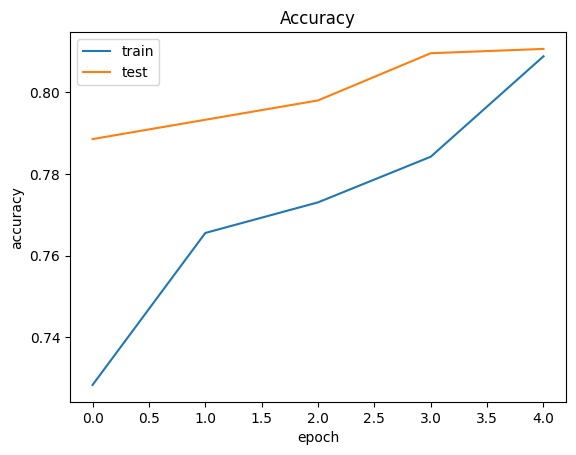

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

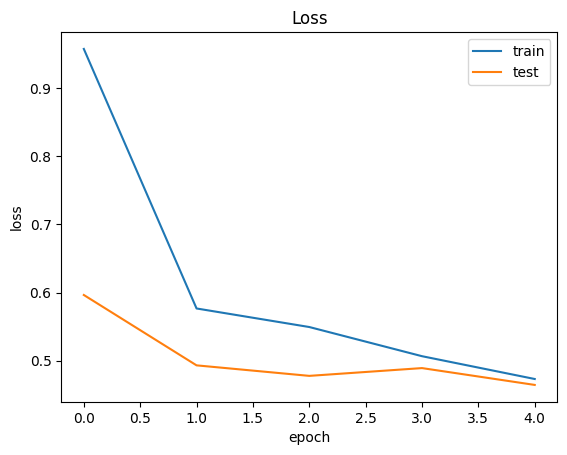

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

60/60 [==============================] - 287s 5s/step


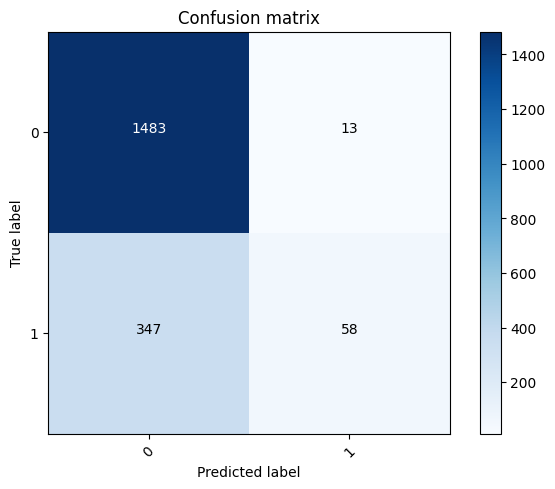

In [21]:
Y_pred = model1.predict(x_dev)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_dev,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1496
           1       0.82      0.14      0.24       405

    accuracy                           0.81      1901
   macro avg       0.81      0.57      0.57      1901
weighted avg       0.81      0.81      0.75      1901

